In [1]:
import pandas as pd
pd.set_option('max_columns', None)

collisions = pd.read_csv("../data/NYPD_Motor_Vehicle_Collisions_2016.csv", index_col=0)

In [2]:
%matplotlib inline

In [3]:
collisions.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,11/10/2016,15:11,NaN,NaN,NaN,NaN,NaN,MONROE STREET,NaN,NaN,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,3559084,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
1,04/16/2016,4:13,NaN,NaN,40.767373,-73.950057,"(40.767373, -73.9500574)",EAST 68 STREET,NaN,NaN,1,0,0,0,0,0,1,0,Fatigued/Drowsy,Fatigued/Drowsy,Fatigued/Drowsy,NaN,NaN,3408932,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN
2,04/16/2016,4:22,NaN,NaN,NaN,NaN,NaN,BORDEN AVENUE,58TH STREET,NaN,1,0,1,0,0,0,0,0,Passenger Distraction,NaN,NaN,NaN,NaN,3425902,NaN,NaN,NaN,NaN,NaN
3,04/16/2016,4:30,BRONX,10468.0,40.862679,-73.909040,"(40.8626793, -73.9090397)",SEDGWICK AVENUE,WEST FORDHAM ROAD,NaN,0,0,0,0,0,0,0,0,Alcohol Involvement,NaN,NaN,NaN,NaN,3414396,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
4,04/16/2016,4:30,BROOKLYN,11249.0,40.716508,-73.961275,"(40.7165078, -73.9612751)",NaN,NaN,203 BERRY STREET,0,0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,3421852,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN


`seaborn` is a convenient, flexible, and terrifically well-thought out data exploration -targeted data visualization library.

Let's see a few highlights.

First, a bar chart.

The before:

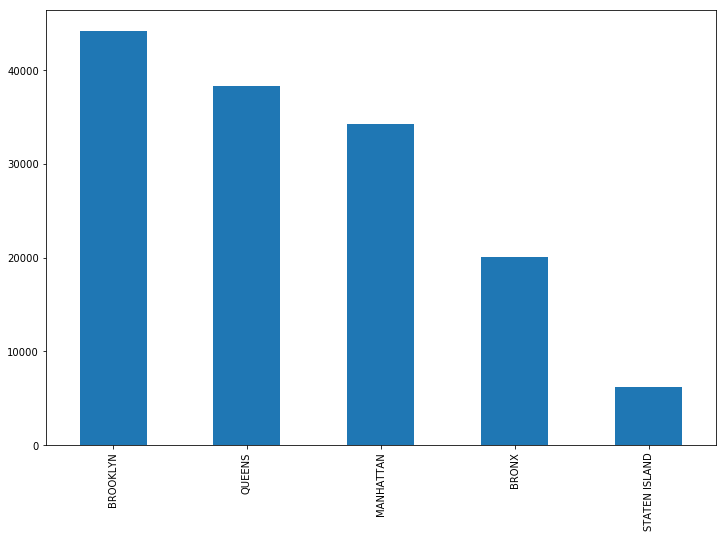

In [5]:
df = collisions['BOROUGH'].value_counts()
df.plot.bar(figsize=(12, 8))

The after:

In [7]:
import seaborn as sns

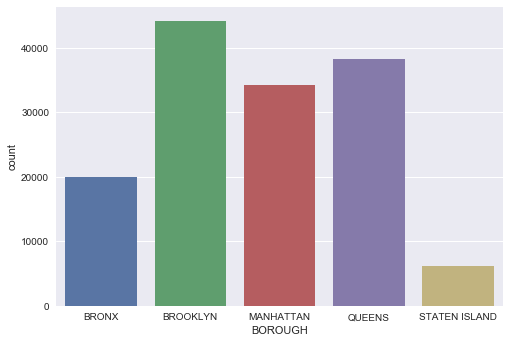

In [12]:
sns.countplot(collisions['BOROUGH'])

`countplot` does the counting aggregation for you. That is a really useful shortcut.

Plus, check out what the API reference has to say about data formats:

> Input data can be passed in a variety of formats, including:
> * Vectors of data represented as lists, numpy arrays, or pandas Series objects passed directly to the x, y, and/or hue parameters.
> * A “long-form” DataFrame, in which case the x, y, and hue variables will determine how the data are plotted.
> * A “wide-form” DataFrame, such that each numeric column will be plotted.
> * Anything accepted by plt.boxplot (e.g. a 2d array or list of vectors)

In other words, no crazy `melt`-`pivot`-`unstack` shenanigans. This really lowers the barrier to entry of plotting your data and makes things a lot easier.

(as an aside, `seaborn` isn't very consistent about providing resizing options, so we'll have to reach into another library called `matplotlib` to do that. more on that later!)

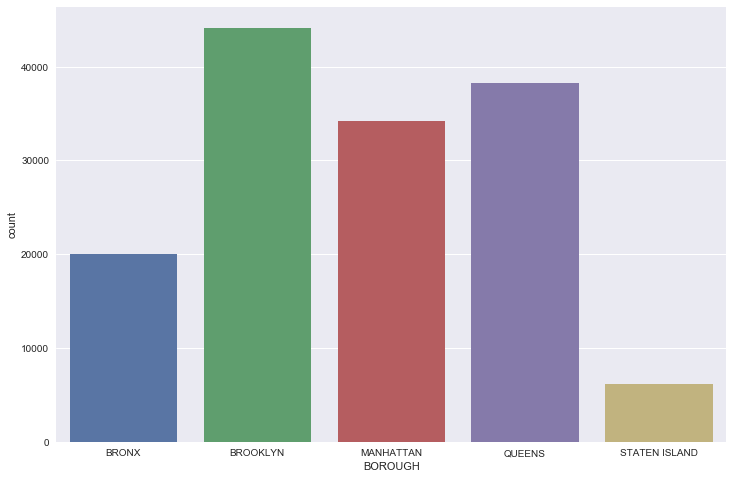

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.countplot(collisions['BOROUGH'])

Another thing that's important to be aware of: `seaborn` injects its own style into the notebook. This modifies other plotters which also use `matplotlib`. If we redraw the `pandas` chart, here's what we get:

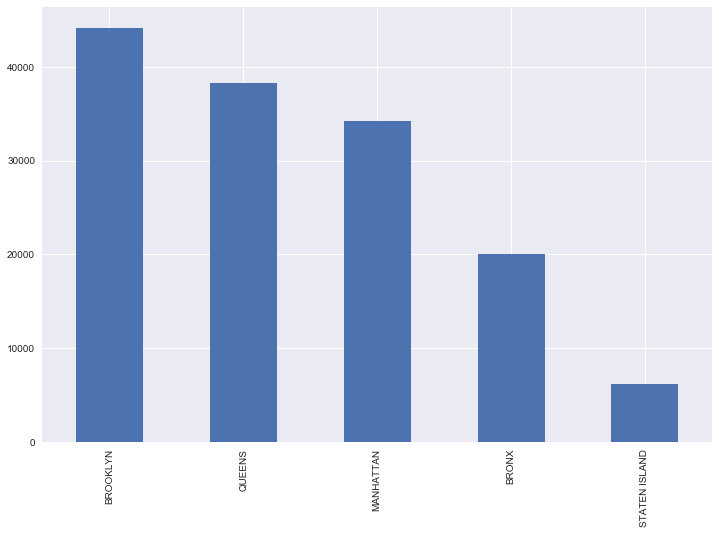

In [18]:
df = collisions['BOROUGH'].value_counts()
df.plot.bar(figsize=(12, 8))

Usually the redraw is quite a bit nicer-looking, but YMMV.

In [19]:
df = (collisions
          .groupby(['CONTRIBUTING FACTOR VEHICLE 1', 'NUMBER OF PERSONS INJURED'])
          .count()
          .loc[:, 'DATE']
          .rename('COUNT(COLLISIONS)')
          .to_frame()
          .unstack('NUMBER OF PERSONS INJURED'))

df.columns = df.columns.droplevel(0)

df = (df.rename_axis("INJURIES", axis='columns')
         .rename_axis("CONTRIBUTING FACTOR", axis='rows')
         .apply(lambda srs: srs.set_value("2+", srs.iloc[2:].sum()), axis=1)
         .apply(lambda srs: srs.drop(srs.iloc[2:-1].index.values), axis=1)
         .fillna(0)
         .drop("Unspecified")
         .sort_values(by=0, ascending=False)
         .head(5))

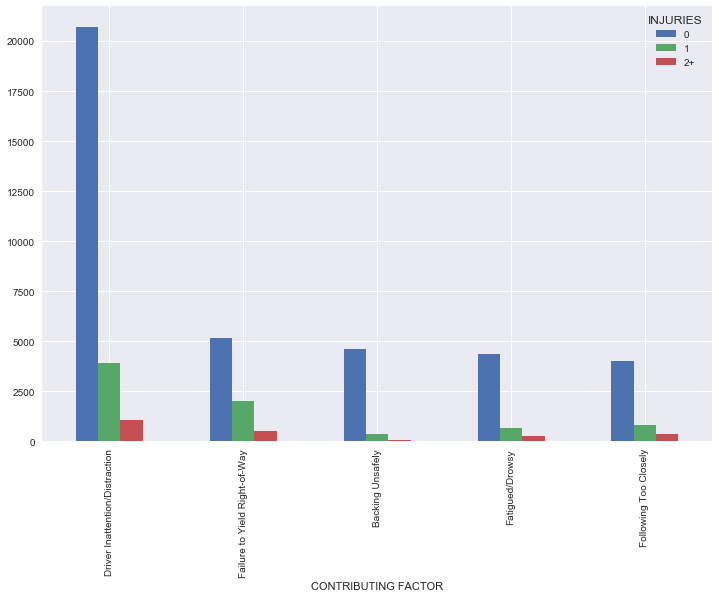

In [20]:
df.plot.bar(figsize=(12,8))

In [40]:
collisions['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().head()

Unspecified                       125486
Driver Inattention/Distraction     25655
Failure to Yield Right-of-Way       7671
Fatigued/Drowsy                     5295
Following Too Closely               5194
Name: CONTRIBUTING FACTOR VEHICLE 1, dtype: int64

In [36]:
top_five_collision_factors = collisions['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().iloc[1:6].index

In [38]:
top_five_collision_factors

Index(['Driver Inattention/Distraction', 'Failure to Yield Right-of-Way',
       'Fatigued/Drowsy', 'Following Too Closely', 'Backing Unsafely'],
      dtype='object')

In [43]:
collisions_of_interest = collisions[
    (collisions['CONTRIBUTING FACTOR VEHICLE 1'].isin(top_five_collision_factors)) &&
]

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,11/10/2016,15:11,NaN,NaN,NaN,NaN,NaN,MONROE STREET,NaN,NaN,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,3559084,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
1,04/16/2016,4:13,NaN,NaN,40.767373,-73.950057,"(40.767373, -73.9500574)",EAST 68 STREET,NaN,NaN,1,0,0,0,0,0,1,0,Fatigued/Drowsy,Fatigued/Drowsy,Fatigued/Drowsy,NaN,NaN,3408932,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN
10,04/16/2016,5:40,BROOKLYN,11207.0,40.671165,-73.895671,"(40.6711646, -73.8956708)",NaN,NaN,265 PENNSYLVANIA AVENUE,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Driver Inattention/Distraction,NaN,NaN,NaN,3419059,AMBULANCE,NaN,NaN,NaN,NaN
18,11/10/2016,16:11,BROOKLYN,11208.0,40.662514,-73.872007,"(40.6625139, -73.8720068)",WORTMAN AVENUE,MONTAUK AVENUE,NaN,0,0,0,0,0,0,0,0,Failure to Yield Right-of-Way,Unspecified,NaN,NaN,NaN,3559576,TAXI,PASSENGER VEHICLE,NaN,NaN,NaN
21,11/10/2016,5:11,MANHATTAN,10013.0,40.721323,-74.008344,"(40.7213228, -74.0083444)",HUBERT STREET,HUDSON STREET,NaN,1,0,1,0,0,0,0,0,Failure to Yield Right-of-Way,NaN,NaN,NaN,NaN,3557391,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
28,04/16/2016,5:45,BRONX,10466.0,40.881266,-73.838743,"(40.8812664, -73.8387425)",BOSTON ROAD,BAYCHESTER AVENUE,NaN,1,0,0,0,0,0,1,0,Driver Inattention/Distraction,Driver Inattention/Distraction,NaN,NaN,NaN,3413414,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
30,04/16/2016,5:50,QUEENS,11374.0,40.727058,-73.870631,"(40.7270584, -73.8706309)",WOODHAVEN BOULEVARD,62 AVENUE,NaN,0,0,0,0,0,0,0,0,Fatigued/Drowsy,Fatigued/Drowsy,NaN,NaN,NaN,3428082,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
31,04/16/2016,6:04,QUEENS,11434.0,NaN,NaN,NaN,ROCKAWAY BOULEVARD,BREWER BOULEVARD,NaN,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Driver Inattention/Distraction,NaN,NaN,NaN,3424176,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
33,04/16/2016,7:15,BROOKLYN,11214.0,40.593001,-73.988730,"(40.5930014, -73.9887299)",BATH AVENUE,26 AVENUE,NaN,1,0,0,0,0,0,1,0,Driver Inattention/Distraction,Driver Inattention/Distraction,Driver Inattention/Distraction,NaN,NaN,3415388,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN
36,04/16/2016,7:45,QUEENS,11416.0,40.688853,-73.841321,"(40.688853, -73.8413209)",103 STREET,95 AVENUE,NaN,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Driver Inattention/Distraction,NaN,NaN,NaN,3422501,PASSENGER VEHICLE,NaN,NaN,NaN,NaN


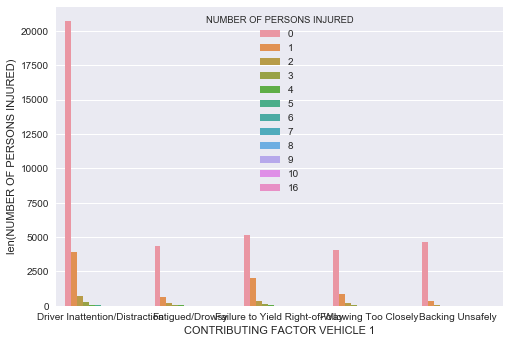

In [53]:
sns.barplot(x='CONTRIBUTING FACTOR VEHICLE 1', 
            y='NUMBER OF PERSONS INJURED',
            hue='NUMBER OF PERSONS INJURED',
            estimator=len,
            data=(collisions[collisions['CONTRIBUTING FACTOR VEHICLE 1'].isin(top_five_collision_factors)]))